In [4]:
import gymnasium

In [5]:
env = gymnasium.make("CartPole-v1")

In [7]:
env.reset()
env.render()

/home/led/miniconda3/lib/python3.11/site-packages/gymnasium/envs/classic_control/cartpole.py:215: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


In [36]:
env.action_space.shape

()

In [1]:
import torch

In [9]:
torch.nn.init.calculate_gain('relu')

1.4142135623730951

In [86]:
a = torch.zeros(0, 4)

In [87]:
a

tensor([], size=(0, 4))

In [117]:
b = torch.tensor(
    # [1]
    [1, 2, 3]
    )

In [47]:
torch.squeeze(b, -1) 

tensor(1)

In [116]:
torch.tensor(
    # [1]
    [1]
    ).unsqueeze(dim=0)

tensor([[1]])

In [121]:
torch.cat((b, b), dim=0)

tensor([1, 2, 3, 1, 2, 3])

In [19]:
b.numpy()[::-1]

array([4, 3, 2, 1])

In [22]:
b.flip(0)

tensor([4, 3, 2, 1])

In [20]:
import numpy as np

In [54]:
np.zeros((0, env.action_space.shape))

TypeError: 'tuple' object cannot be interpreted as an integer

In [65]:
np.concatenate((
    # np.array([1]),
    # np.zeros(0), 
    np.array(1),
    np.array(0)
), axis=0)

ValueError: zero-dimensional arrays cannot be concatenated

In [36]:
a = [1, 2,3]
a.extend(a*2)
a

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [28]:
np.append(np.zeros(0), 1)

array([1.])

In [17]:
import scipy

In [24]:
out = scipy.signal.lfilter([1], [1, float(-1)], b.flip(0), axis=0)[::-1]

In [25]:
out

numpy.ndarray

In [16]:
import scipy

In [10]:
env.action_space

Discrete(2)

In [66]:
from agent import ActorCritic

In [67]:
from torchviz import make_dot

In [68]:
agent = ActorCritic(
    env.observation_space,
    env.action_space,
)

In [71]:
env.observation_space.shape

(4,)

In [73]:
out = agent.step(torch.rand(4))

In [79]:
agent

ActorCritic(
  (policy): MLP(
    (stem): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=2, bias=True)
    )
  )
  (value): MLP(
    (stem): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)

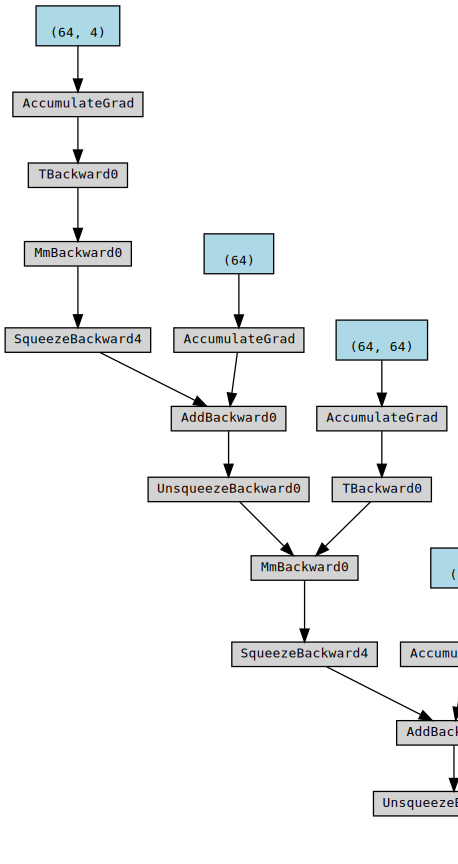

In [78]:
make_dot(out[-1])